In [1]:
# generic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# notebook settings
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2 
# precision and plot settings
num_precision = 3
np.set_printoptions(precision=num_precision, suppress=True)
pd.set_option('display.float_format', lambda x: f'{x:,.{num_precision}f}')
pd.set_option("display.precision", num_precision)
pd.set_option('display.max_columns', None)
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['lines.linewidth'] = 2

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
# setup dir and import helper functions
import sys, os
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'src'))
import helper_funcs as my_funcs

In [4]:
directory = '../data/sat_images/wild_est/'

In [12]:
batch_size = 64
img_size = 256

In [13]:
X_train = image_dataset_from_directory(
    directory, labels='inferred', class_names=None, # maybe need: label_mode='binary' and rename directories to 0 1
    color_mode='rgb', batch_size=batch_size, image_size=(img_size, img_size), shuffle=True, seed=42,
    validation_split=0.2, subset='training', interpolation='bilinear', follow_links=True
)
# this batch size is how it divides the data in the epochs below

Found 16232 files belonging to 2 classes.
Using 12986 files for training.


In [14]:
X_test = image_dataset_from_directory(
    directory, labels='inferred', class_names=None, # # maybe need: label_mode='binary' and rename directories to 0 1
    color_mode='rgb', batch_size=batch_size, image_size=(img_size, img_size), shuffle=True, seed=42, # maybe not need shuffle
    validation_split=0.2, subset='validation', interpolation='bilinear', follow_links=True
)

Found 16232 files belonging to 2 classes.
Using 3246 files for validation.


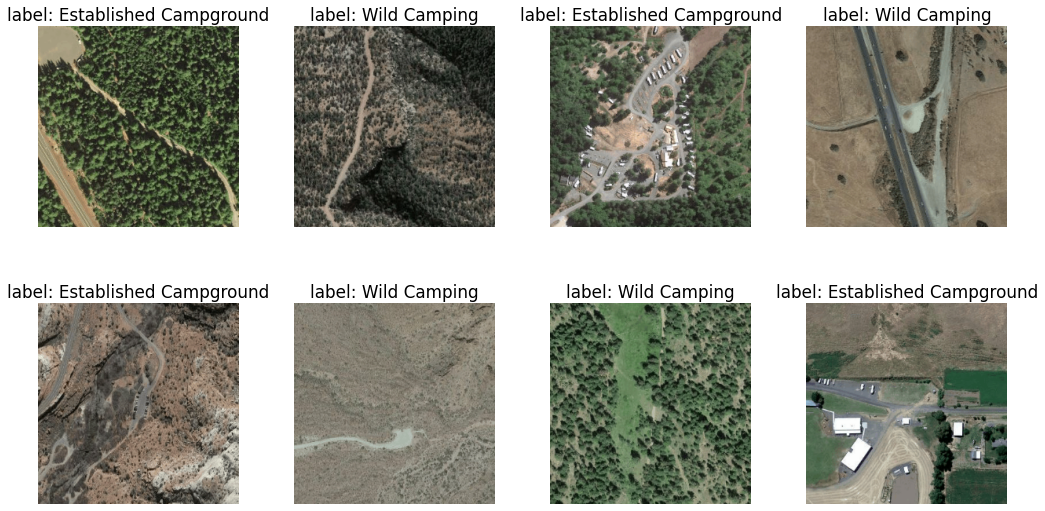

In [24]:
plt.rcParams['font.size'] = 14
my_funcs.plot_example_imgs(X_train, figsize=(15, 8), num_samples=10);

In [19]:
# try sobel?
from tensorflow.image import sobel_edges
from tensorflow import clip_by_value

In [ ]:
# put into X and y
image_batch, labels_batch = next(iter(X_train))

In [27]:
# image_batch_sobeled = sobel_edges(image_batch)
# maybe save these as images in new dir
# X_train_ds = X_train.map(sobel_edges) # only wants X

In [ ]:
# # example
# def parse_image(filename):
#   parts = tf.strings.split(filename, os.sep)
#   label = parts[-2]

#   image = tf.io.read_file(filename)
#   image = tf.image.decode_jpeg(image)
#   image = tf.image.convert_image_dtype(image, tf.float32)
#   image = tf.image.resize(image, [128, 128])
#   return image, label

In [59]:
# def sobel_image(image):
#     '''
#     test with an image
#     if it works change this to iterate through whole ds
#     '''
#     image = image[0].numpy().astype("uint8")
#     image_batch_sobeled = sobel_edges(image)
#     #     image_sobeled = clip_0_1(image_batch_sobeled[...,0]/4+0.5)
#     return image_batch_sobeled

In [70]:
from skimage.filters import sobel

In [77]:
def sobel_image(image):
    '''
    test with an image
    if it works change this to iterate through whole ds
    using skimage edge magnitude is computed:
    sobel_mag = np.sqrt(sum([sobel(image, axis=i)**2
                         for i in range(image.ndim)]) / image.ndim)
    '''
    image = image[0]
    image_sobeled = sobel(image)
    return image_sobeled

In [78]:
test_sobel = sobel_image(image_batch)

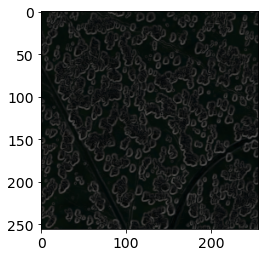

In [87]:
plt.imshow(test_sobel.astype('uint8'))

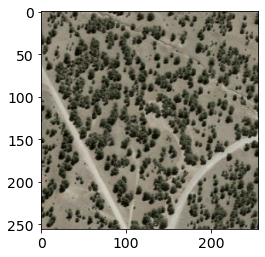

In [86]:
plt.imshow(image_batch[0].numpy().astype('uint8'))

In [37]:
# def sobel_image_batch(tf_dataset):
#     '''
#     test with a batch
#     if it works change this to iterate through whole ds
#     '''
#     # just batch
#     image_batch, labels_batch = next(iter(X_train))
#     image_batch_sobeled = sobel_edges(image_batch)
#     # clip_0_1(image_batch_sobeled[0][...,0]/4+0.5)
#     for image in image_batch_sobeled:
#         print(image.shape)
# #         clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
# #     return image_batch_sobeled, labels_batch

In [31]:
X_train_sobel_ds = X_train.map(sobel_image)

TypeError: in user code:


    TypeError: tf__sobel_image() takes 1 positional argument but 2 were given


In [21]:
my_funcs.plot_example_imgs(image_batch_sobeled, figsize=(15, 8), num_samples=10);

ValueError: too many values to unpack (expected 2)

Tensor holding edge maps for each channel. Returns a tensor with shape [batch_size, h, w, d, 2] where the last two dimensions hold [[dy[0], dx[0]], [dy[1], dx[1]], ..., [dy[d-1], dx[d-1]]] calculated using the Sobel filter.